In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from PIL import Image
import pickle
import random
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [20, 10]

###Only run the following two cells in case the folders "NegativosCrop_v2" and "PositivosCrop_v2" do not exist

In [ ]:
n = 500
box = (400+n, 0+n, 3450-n, 3000-n)

In [ ]:
path_imagenes = '/content/drive/MyDrive/Agglutination/Dataset/Raw Dataset'
clases = ['Negativos_v2', 'Positivos_v2']

for clase in clases:
    path = os.path.join(path_imagenes, clase)
    for img, i in tqdm(zip(os.listdir(path), range(len(os.listdir(path))))):
        image = Image.open(os.path.join(path, img))
        cropped_image = image.crop(box)
        i_string = str(i)
        path_save = os.path.join(path_imagenes, clase.split('_')[0] + 'Crop_' + clase.split('_')[1], i_string + '.jpg')
        cropped_image.save(path_save)

620it [08:08,  1.27it/s]
665it [08:21,  1.33it/s]


##Pre-processing for images with shape: (224, 224)  ----> Gray-scale images

In [ ]:
IMG_SIZE = 224

total_data = []
X = []
y = []

In [ ]:
path_imagenes = '/content/drive/MyDrive/Agglutination/Dataset/Cropped Dataset'
CATEGORIES = ['NegativosCrop_v2', 'PositivosCrop_v2']
    
for category in CATEGORIES:
    path = os.path.join(path_imagenes, category)
    class_num = CATEGORIES.index(category) 
    for img in tqdm(os.listdir(path)):
        img_array = rgb2gray(io.imread(os.path.join(path, img)))
        new_array = resize(img_array, (IMG_SIZE, IMG_SIZE)) 
        total_data.append([new_array, class_num])

random.shuffle(total_data)

100%|██████████| 665/665 [03:48<00:00,  2.91it/s]


In [ ]:
len(total_data)

1285

In [ ]:
for feature, label in total_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

X = np.expand_dims(np.array(X),3)

X.shape, y.shape

((1285, 224, 224, 1), (1285,))

In [ ]:
########################################################
## Saving the pre-processed dataset for a quick reading   

path_X = '/content/drive/MyDrive/Agglutination/Dataset/Pre-Processed Dataset/' + 'Xcrop_gray_v2.pickle'
path_y = '/content/drive/MyDrive/Agglutination/Dataset/Pre-Processed Dataset/' + 'ycrop_gray_v2.pickle'

pickle_out = open(path_X, "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(path_y, "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Imagen con etiqueta: 1



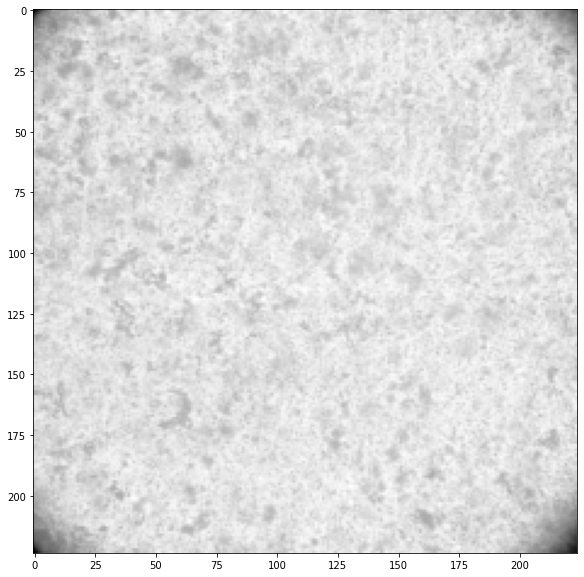


Valor mínimo: 0.14085756734393143
Valor máximo 0.9567911532667523


In [ ]:
######################################
## Showing some images of the dataset

m = random.randint(0, len(X))
print('Image with label:', y[m])
print()
plt.imshow(np.reshape(X[m], (224, 224)), cmap='gray')
plt.show()
print()
print('Minimum value:', X[m].min())
print('Maximum value', X[m].max())

##Pre-processing for images with shape: (224, 224, 3)  ----> RGB images

In [ ]:
IMG_SIZE = 224

total_data = []
X = []
y = []

In [ ]:
path_imagenes = '/content/drive/MyDrive/Agglutination/Dataset/Cropped Dataset'
CATEGORIES = ['NegativosCrop_v2', 'PositivosCrop_v2']
    
for category in CATEGORIES:
    path = os.path.join(path_imagenes, category)
    class_num = CATEGORIES.index(category) 
    for img in tqdm(os.listdir(path)):
        img_array = io.imread(os.path.join(path, img))
        new_array = resize(img_array, (IMG_SIZE, IMG_SIZE)) 
        total_data.append([new_array, class_num])

random.shuffle(total_data)

100%|██████████| 665/665 [08:20<00:00,  1.33it/s]


In [ ]:
len(total_data)

1285

In [ ]:
for feature, label in total_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((1285, 224, 224, 3), (1285,))

In [ ]:
########################################################
## Saving the pre-processed dataset for a quick reading  

path_X = '/content/drive/MyDrive/Agglutination/Dataset/Pre-Processed Dataset/' + 'Xcrop_rgb_v2.pickle'
path_y = '/content/drive/MyDrive/Agglutination/Dataset/Pre-Processed Dataset/' + 'ycrop_rgb_v2.pickle'

pickle_out = open(path_X, "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(path_y, "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Imagen con etiqueta: 0



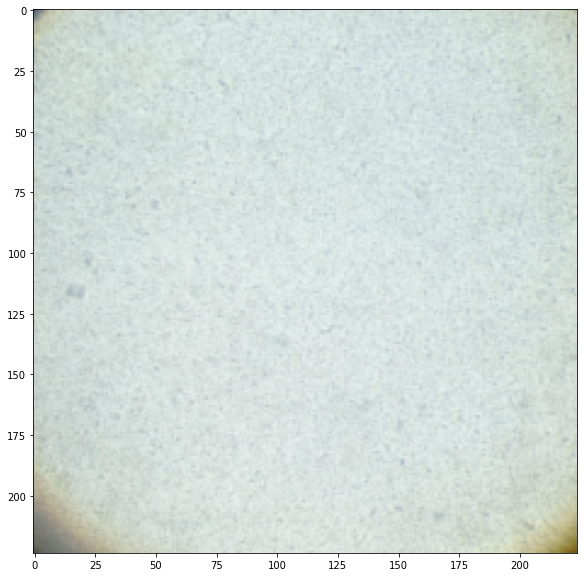


Min value for Blue Channel: 0.2749649859944028
Max value for Blue Channel: 0.9137254901960785

Min value for Green Channel: 0.3176470588235294
Max value for Green Channel: 0.9535670518207278

Min value for Red Channel: 0.07466736694678265
Max value for Red Channel: 0.9489670868347327



In [ ]:
p = random.randint(0, len(X))
print('Image with label:', y[p])
print()
plt.imshow(X[p])
plt.show()
print()
b = X[p][:,:,0]
g = X[p][:,:,1]
r = X[p][:,:,2]
print('Min value for Blue Channel:', b.min())
print('Max value for Blue Channel:', b.max())
print()
print('Min value for Green Channel:', g.min())
print('Max value for Green Channel:', g.max())
print()
print('Min value for Red Channel:', r.min())
print('Max value for Red Channel:', r.max())
print()